In [8]:
import os

In [12]:
os.getcwd()

'/Users/shibaprasad/Documents/Projects/explorations'

In [19]:
import numpy as np
from scipy import stats

# Data
ucl_matches = 50
ucl_wins = 17
league_matches = 618
league_wins = 374

# Win rates
p_ucl = ucl_wins / ucl_matches
p_league = league_wins / league_matches

# Pooled proportion
p_pooled = (ucl_wins + league_wins) / (ucl_matches + league_matches)

# Standard error
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/ucl_matches + 1/league_matches))

# Z-statistic
z = (p_league - p_ucl) / se

# P-value (one-tailed)
p_value = 1 - stats.norm.cdf(z)

print(f"UCL win rate: {p_ucl:.3f}")
print(f"League win rate: {p_league:.3f}")
print(f"Difference: {p_league - p_ucl:.3f}")
print(f"Z-statistic: {z:.3f}")
print(f"P-value: {p_value:.6f}")
print(f"\nSignificant at α=0.05? {p_value < 0.05}")

UCL win rate: 0.340
League win rate: 0.605
Difference: 0.265
Z-statistic: 3.661
P-value: 0.000126

Significant at α=0.05? True


In [2]:
# Contingency table: [UCL, League] x [Win, Draw, Loss]
observed = np.array([
    [17, 16, 17],   # UCL
    [374, 134, 110] # League
])

# Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Additional metrics
total_ucl = observed[0].sum()
total_league = observed[1].sum()

print("Observed frequencies:")
print(f"         Win   Draw  Loss")
print(f"UCL:     {observed[0][0]:3d}   {observed[0][1]:3d}   {observed[0][2]:3d}  (n={total_ucl})")
print(f"League:  {observed[1][0]:3d}   {observed[1][1]:3d}   {observed[1][2]:3d}  (n={total_league})")

print("\nExpected frequencies (if distributions were same):")
print(f"         Win    Draw   Loss")
print(f"UCL:     {expected[0][0]:5.1f}  {expected[0][1]:5.1f}  {expected[0][2]:5.1f}")
print(f"League:  {expected[1][0]:5.1f}  {expected[1][1]:5.1f}  {expected[1][2]:5.1f}")

print(f"\nχ² = {chi2:.3f}")
print(f"df = {dof}")
print(f"p-value = {p_value:.6f}")
print(f"\nSignificant at α=0.05? {p_value < 0.05}")

# Effect size (Cramér's V)
n = observed.sum()
cramers_v = np.sqrt(chi2 / (n * (min(observed.shape) - 1)))
print(f"Cramér's V = {cramers_v:.3f}")

Observed frequencies:
         Win   Draw  Loss
UCL:      17    16    17  (n=50)
League:  374   134   110  (n=618)

Expected frequencies (if distributions were same):
         Win    Draw   Loss
UCL:      29.3   11.2    9.5
League:  361.7  138.8  117.5

χ² = 14.136
df = 2
p-value = 0.000852

Significant at α=0.05? True
Cramér's V = 0.145


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data
ucl_wins, ucl_n = 17, 50
league_wins, league_n = 374, 618

# Prior: Beta(1,1) = Uniform (non-informative)
# You could use Beta(2,2) for slight regularization
alpha_prior, beta_prior = 1, 1

# Posterior distributions
# Beta(alpha + wins, beta + losses)
ucl_posterior = stats.beta(alpha_prior + ucl_wins, 
                           beta_prior + (ucl_n - ucl_wins))
league_posterior = stats.beta(alpha_prior + league_wins, 
                              beta_prior + (league_n - league_wins))

# Sample from posteriors
np.random.seed(42)
n_samples = 100000
ucl_samples = ucl_posterior.rvs(n_samples)
league_samples = league_posterior.rvs(n_samples)

# Probability that league win rate > UCL win rate
prob_league_better = np.mean(league_samples > ucl_samples)

# Difference distribution
diff_samples = league_samples - ucl_samples

# Credible intervals
ucl_ci = ucl_posterior.interval(0.95)
league_ci = league_posterior.interval(0.95)
diff_ci = np.percentile(diff_samples, [2.5, 97.5])

print("Posterior summaries:")
print(f"\nUCL win rate:")
print(f"  Mean: {ucl_posterior.mean():.3f}")
print(f"  95% CI: [{ucl_ci[0]:.3f}, {ucl_ci[1]:.3f}]")

print(f"\nLeague win rate:")
print(f"  Mean: {league_posterior.mean():.3f}")
print(f"  95% CI: [{league_ci[0]:.3f}, {league_ci[1]:.3f}]")

print(f"\nDifference (League - UCL):")
print(f"  Mean: {diff_samples.mean():.3f}")
print(f"  95% CI: [{diff_ci[0]:.3f}, {diff_ci[1]:.3f}]")

print(f"\nP(League > UCL) = {prob_league_better:.4f}")
print(f"Bayes Factor: {prob_league_better / (1 - prob_league_better):.1f}:1")

Posterior summaries:

UCL win rate:
  Mean: 0.346
  95% CI: [0.224, 0.479]

League win rate:
  Mean: 0.605
  95% CI: [0.566, 0.643]

Difference (League - UCL):
  Mean: 0.259
  95% CI: [0.121, 0.387]

P(League > UCL) = 0.9999
Bayes Factor: 7691.3:1


Saved to: /Users/shibaprasad/Documents/Projects/shibaprasadb.github.io/images/posts/2026-02-04-tale-of-two-contes/tactical_fingerprints.png


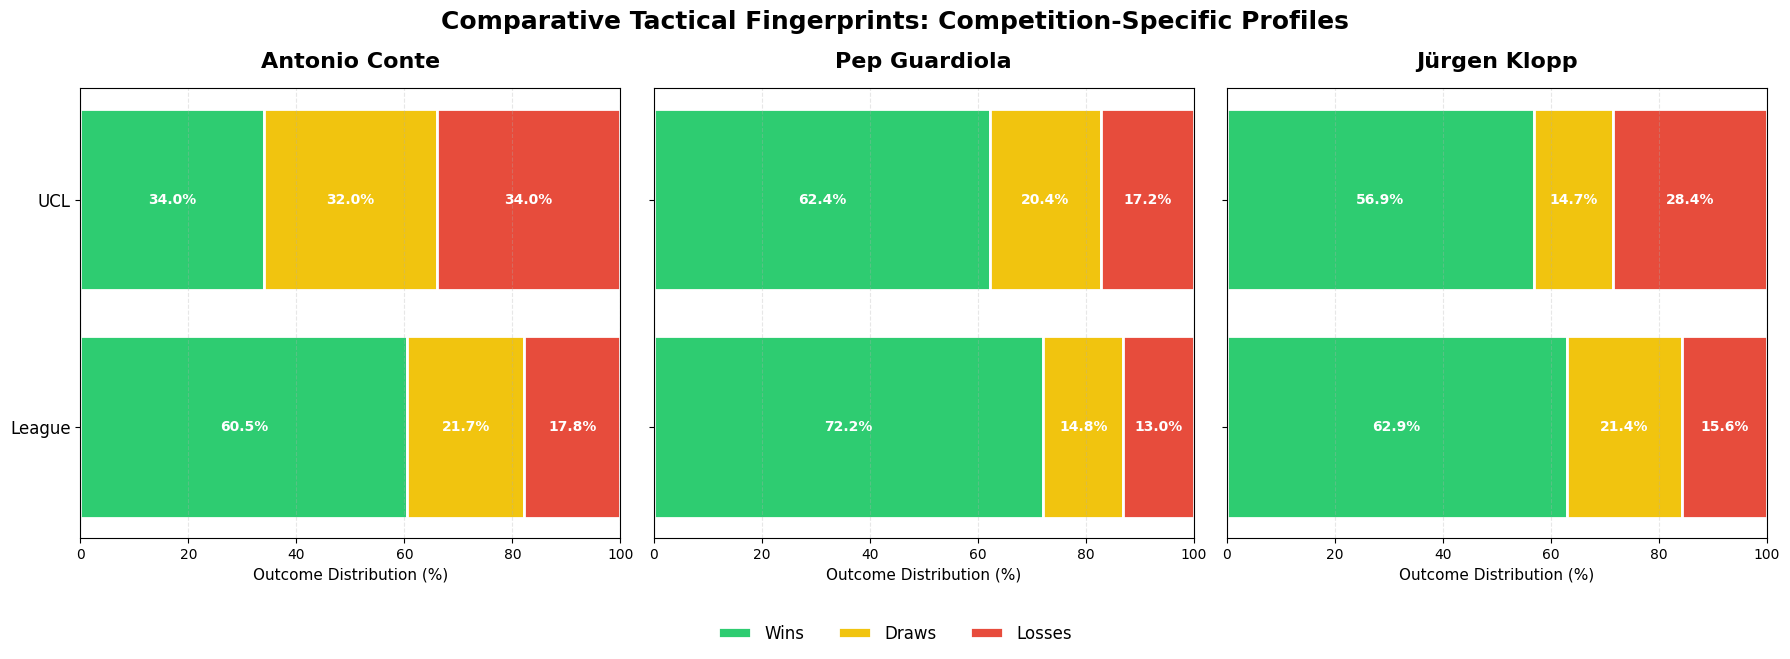

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Semantically named performance data (As of Jan 2026)
# Format: [Wins, Draws, Losses]
manager_data = {
    'Antonio Conte': {
        'League': [374, 134, 110],
        'UCL':    [17, 16, 17]
    },
    'Pep Guardiola': {
        'League': [415, 85, 75],
        'UCL':    [116, 38, 32]
    },
    'Jürgen Klopp': {
        'Elite League': [338, 115, 84],  # Dortmund/Liverpool
        'UCL':          [58, 15, 29]
    }
}

# Visualization settings
competitions = ['League', 'UCL']
colors = ['#2ecc71', '#f1c40f', '#e74c3c']  # Wins, Draws, Losses

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (manager_name, profiles) in zip(axes, manager_data.items()):
    y_positions = np.arange(len(competitions))
    
    # Calculate normalized distribution for this manager
    distributions = []
    for comp in competitions:
        raw_counts = profiles.get(comp) or profiles.get('Elite League')
        total = sum(raw_counts)
        distributions.append([count / total * 100 for count in raw_counts])
    
    distributions = np.array(distributions)
    wins = distributions[:, 0]
    draws = distributions[:, 1]
    losses = distributions[:, 2]
    
    # Build the stacked horizontal bars
    ax.barh(y_positions, wins, color=colors[0], label='Wins', edgecolor='white', linewidth=2)
    ax.barh(y_positions, draws, left=wins, color=colors[1], label='Draws', edgecolor='white', linewidth=2)
    ax.barh(y_positions, losses, left=wins+draws, color=colors[2], label='Losses', edgecolor='white', linewidth=2)
    
    # Labeling and Formatting for the Facet
    ax.set_title(manager_name, fontsize=16, fontweight='bold', pad=15)
    ax.set_yticks(y_positions)
    ax.set_yticklabels(['League', 'UCL'], fontsize=12)
    ax.set_xlabel('Outcome Distribution (%)', fontsize=11)
    ax.set_xlim(0, 100)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Annotate bars with percentages
    for i, row in enumerate(distributions):
        # Only label segments if they are significant enough to fit text
        if row[0] > 10:
            ax.text(row[0]/2, i, f'{row[0]:.1f}%', va='center', ha='center', 
                   color='white', fontweight='bold', fontsize=10)
        if row[1] > 10:
            ax.text(row[0] + row[1]/2, i, f'{row[1]:.1f}%', va='center', ha='center', 
                   color='white', fontweight='bold', fontsize=10)
        if row[2] > 10:
            ax.text(row[0] + row[1] + row[2]/2, i, f'{row[2]:.1f}%', va='center', ha='center', 
                   color='white', fontweight='bold', fontsize=10)

# Global legend and layout
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.02), 
          ncol=3, frameon=False, fontsize=12)

plt.suptitle("Comparative Tactical Fingerprints: Competition-Specific Profiles", 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()

# Save to GitHub folder
save_path = '/Users/shibaprasad/Documents/Projects/shibaprasadb.github.io/images/posts/2026-02-04-tale-of-two-contes/tactical_fingerprints.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved to: {save_path}")
plt.show()

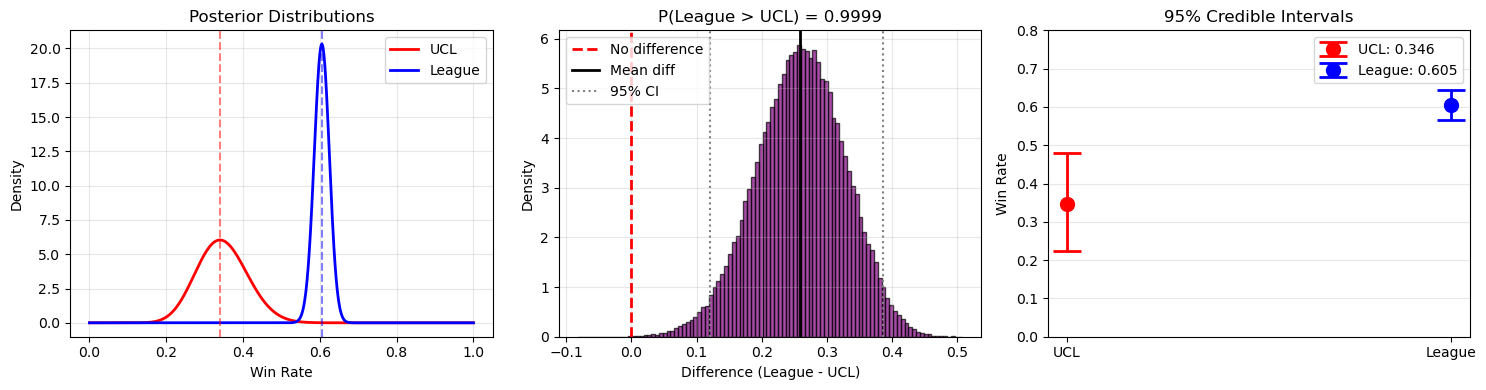


UCL: 0.346 [0.224, 0.479]
League: 0.605 [0.566, 0.643]
Difference: 0.259 [0.121, 0.387]

P(League > UCL) = 0.9999


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data
ucl_wins, ucl_n = 17, 50
league_wins, league_n = 374, 618

# Posteriors
ucl_posterior = stats.beta(1 + ucl_wins, 1 + (ucl_n - ucl_wins))
league_posterior = stats.beta(1 + league_wins, 1 + (league_n - league_wins))

# Samples
np.random.seed(42)
ucl_samples = ucl_posterior.rvs(100000)
league_samples = league_posterior.rvs(100000)
diff_samples = league_samples - ucl_samples

prob_league_better = np.mean(league_samples > ucl_samples)
diff_ci = np.percentile(diff_samples, [2.5, 97.5])

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Posterior distributions
x = np.linspace(0, 1, 1000)
axes[0].plot(x, ucl_posterior.pdf(x), label='UCL', color='red', linewidth=2)
axes[0].plot(x, league_posterior.pdf(x), label='League', color='blue', linewidth=2)
axes[0].axvline(ucl_wins/ucl_n, color='red', linestyle='--', alpha=0.5)
axes[0].axvline(league_wins/league_n, color='blue', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Win Rate')
axes[0].set_ylabel('Density')
axes[0].set_title('Posterior Distributions')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Difference distribution
axes[1].hist(diff_samples, bins=100, density=True, alpha=0.7, color='purple', edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='No difference')
axes[1].axvline(diff_samples.mean(), color='black', linestyle='-', linewidth=2, label=f'Mean diff')
axes[1].axvline(diff_ci[0], color='gray', linestyle=':', linewidth=1.5, label='95% CI')
axes[1].axvline(diff_ci[1], color='gray', linestyle=':', linewidth=1.5)
axes[1].set_xlabel('Difference (League - UCL)')
axes[1].set_ylabel('Density')
axes[1].set_title(f'P(League > UCL) = {prob_league_better:.4f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Credible intervals
ucl_ci = ucl_posterior.interval(0.95)
league_ci = league_posterior.interval(0.95)
means = [ucl_posterior.mean(), league_posterior.mean()]
cis = [ucl_ci, league_ci]

for i, (mean, ci, color, label) in enumerate(zip(means, cis, ['red', 'blue'], ['UCL', 'League'])):
    axes[2].errorbar(i, mean, yerr=[[mean - ci[0]], [ci[1] - mean]], 
                     fmt='o', markersize=10, capsize=10, capthick=2,
                     color=color, linewidth=2, label=f'{label}: {mean:.3f}')

axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['UCL', 'League'])
axes[2].set_ylabel('Win Rate')
axes[2].set_title('95% Credible Intervals')
axes[2].legend()
axes[2].grid(alpha=0.3, axis='y')
axes[2].set_ylim(0, 0.8)

plt.tight_layout()
plt.show()

# Summary stats
print(f"\nUCL: {ucl_posterior.mean():.3f} [{ucl_ci[0]:.3f}, {ucl_ci[1]:.3f}]")
print(f"League: {league_posterior.mean():.3f} [{league_ci[0]:.3f}, {league_ci[1]:.3f}]")
print(f"Difference: {diff_samples.mean():.3f} [{diff_ci[0]:.3f}, {diff_ci[1]:.3f}]")
print(f"\nP(League > UCL) = {prob_league_better:.4f}")

In [6]:
import numpy as np
from scipy import stats

def z_test_proportions(comp1_wins, comp1_n, comp2_wins, comp2_n, 
                       comp1_name="Competition 1", comp2_name="Competition 2"):
    """Two-proportion z-test"""
    p1 = comp1_wins / comp1_n
    p2 = comp2_wins / comp2_n
    p_pooled = (comp1_wins + comp2_wins) / (comp1_n + comp2_n)
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/comp1_n + 1/comp2_n))
    z = (p2 - p1) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    return {
        'test': 'Z-test',
        f'{comp1_name}_rate': p1,
        f'{comp2_name}_rate': p2,
        'difference': p2 - p1,
        'z_statistic': z,
        'p_value': p_value,
        'significant': p_value < 0.05
    }

def chi_square_test(comp1_wins, comp1_draws, comp1_losses,
                    comp2_wins, comp2_draws, comp2_losses,
                    comp1_name="Competition 1", comp2_name="Competition 2"):
    """Chi-square test with Cramér's V"""
    observed = np.array([
        [comp1_wins, comp1_draws, comp1_losses],
        [comp2_wins, comp2_draws, comp2_losses]
    ])
    
    chi2, p_value, dof, expected = stats.chi2_contingency(observed)
    n = observed.sum()
    cramers_v = np.sqrt(chi2 / (n * (min(observed.shape) - 1)))
    
    return {
        'test': 'Chi-square',
        'chi2': chi2,
        'p_value': p_value,
        'dof': dof,
        'cramers_v': cramers_v,
        'significant': p_value < 0.05,
        'observed': observed,
        'expected': expected,
        'comp1_name': comp1_name,
        'comp2_name': comp2_name
    }

def bayesian_comparison(comp1_wins, comp1_n, comp2_wins, comp2_n,
                       comp1_name="Competition 1", comp2_name="Competition 2",
                       n_samples=100000):
    """Bayesian Beta-Binomial comparison"""
    # Posteriors with uniform prior Beta(1,1)
    comp1_posterior = stats.beta(1 + comp1_wins, 1 + (comp1_n - comp1_wins))
    comp2_posterior = stats.beta(1 + comp2_wins, 1 + (comp2_n - comp2_wins))
    
    # Sample
    np.random.seed(42)
    comp1_samples = comp1_posterior.rvs(n_samples)
    comp2_samples = comp2_posterior.rvs(n_samples)
    diff_samples = comp2_samples - comp1_samples
    
    # Probability comp2 > comp1
    prob_comp2_better = np.mean(comp2_samples > comp1_samples)
    bayes_factor = prob_comp2_better / (1 - prob_comp2_better) if prob_comp2_better < 1 else np.inf
    
    # Credible intervals
    comp1_ci = comp1_posterior.interval(0.95)
    comp2_ci = comp2_posterior.interval(0.95)
    diff_ci = np.percentile(diff_samples, [2.5, 97.5])
    
    return {
        'test': 'Bayesian',
        f'{comp1_name}_mean': comp1_posterior.mean(),
        f'{comp1_name}_ci': comp1_ci,
        f'{comp2_name}_mean': comp2_posterior.mean(),
        f'{comp2_name}_ci': comp2_ci,
        'difference_mean': diff_samples.mean(),
        'difference_ci': diff_ci,
        f'prob_{comp2_name}_better': prob_comp2_better,
        'bayes_factor': bayes_factor
    }

# Test with Conte's data
conte_ucl = {'wins': 17, 'draws': 16, 'losses': 17, 'n': 50}
conte_league = {'wins': 374, 'draws': 134, 'losses': 110, 'n': 618}

print("=== CONTE ===\n")
z_result = z_test_proportions(conte_ucl['wins'], conte_ucl['n'], 
                               conte_league['wins'], conte_league['n'],
                               "UCL", "League")
print(f"Z-test: p={z_result['p_value']:.6f}, diff={z_result['difference']:.3f}")

chi_result = chi_square_test(conte_ucl['wins'], conte_ucl['draws'], conte_ucl['losses'],
                             conte_league['wins'], conte_league['draws'], conte_league['losses'],
                             "UCL", "League")
print(f"Chi-square: χ²={chi_result['chi2']:.3f}, p={chi_result['p_value']:.6f}, V={chi_result['cramers_v']:.3f}")

bayes_result = bayesian_comparison(conte_ucl['wins'], conte_ucl['n'],
                                   conte_league['wins'], conte_league['n'],
                                   "UCL", "League")
print(f"Bayesian: P(League>UCL)={bayes_result['prob_League_better']:.4f}, BF={bayes_result['bayes_factor']:.1f}:1")

=== CONTE ===

Z-test: p=0.000251, diff=0.265
Chi-square: χ²=14.136, p=0.000852, V=0.145
Bayesian: P(League>UCL)=0.9999, BF=7691.3:1


In [7]:
# --- PEP GUARDIOLA (As of Jan 2026) ---
# Includes Barca, Bayern, and Man City
# Just reached 400 wins with City (Jan 28, 2026)
pep_ucl = {'wins': 116, 'draws': 38, 'losses': 32, 'n': 186}
pep_league = {'wins': 415, 'draws': 85, 'losses': 75, 'n': 575}

print("=== PEP GUARDIOLA ===\n")
z_pep = z_test_proportions(pep_ucl['wins'], pep_ucl['n'], 
                            pep_league['wins'], pep_league['n'],
                            "UCL", "League")
print(f"Z-test: p={z_pep['p_value']:.6f}, diff={z_pep['difference']:.3f}")

chi_pep = chi_square_test(pep_ucl['wins'], pep_ucl['draws'], pep_ucl['losses'],
                          pep_league['wins'], pep_league['draws'], pep_league['losses'],
                          "UCL", "League")
print(f"Chi-square: χ²={chi_pep['chi2']:.3f}, p={chi_pep['p_value']:.6f}, V={chi_pep['cramers_v']:.3f}")

bayes_pep = bayesian_comparison(pep_ucl['wins'], pep_ucl['n'],
                                pep_league['wins'], pep_league['n'],
                                "UCL", "League")
print(f"Bayesian: P(League>UCL)={bayes_pep['prob_League_better']:.4f}, BF={bayes_pep['bayes_factor']:.1f}:1")


print("\n" + "="*20 + "\n")

=== PEP GUARDIOLA ===

Z-test: p=0.011341, diff=0.098
Chi-square: χ²=6.441, p=0.039928, V=0.092
Bayesian: P(League>UCL)=0.9944, BF=178.9:1




In [9]:
# --- JÜRGEN KLOPP (Dortmund & Liverpool ONLY) ---
# Mainz excluded to compare "Elite Klopp" vs "Elite Conte"
# Combined League record: ~338 wins in ~537 games (~63%)
# Combined UCL record: ~58 wins in ~102 games (~57%)
klopp_ucl = {'wins': 58, 'draws': 15, 'losses': 29, 'n': 102}
klopp_league = {'wins': 338, 'draws': 115, 'losses': 84, 'n': 537}

print("=== JÜRGEN KLOPP (Dortmund & Liverpool) ===\n")
z_klopp = z_test_proportions(klopp_ucl['wins'], klopp_ucl['n'], 
                              klopp_league['wins'], klopp_league['n'],
                              "UCL", "League")
print(f"Z-test: p={z_klopp['p_value']:.6f}, diff={z_klopp['difference']:.3f}")

chi_klopp = chi_square_test(klopp_ucl['wins'], klopp_ucl['draws'], klopp_ucl['losses'],
                            klopp_league['wins'], klopp_league['draws'], klopp_league['losses'],
                            "UCL", "League")
print(f"Chi-square: χ²={chi_klopp['chi2']:.3f}, p={chi_klopp['p_value']:.6f}, V={chi_klopp['cramers_v']:.3f}")

bayes_klopp = bayesian_comparison(klopp_ucl['wins'], klopp_ucl['n'],
                                  klopp_league['wins'], klopp_league['n'],
                                  "UCL", "League")
print(f"Bayesian: P(League>UCL)={bayes_klopp['prob_League_better']:.4f}, BF={bayes_klopp['bayes_factor']:.1f}:1")

=== JÜRGEN KLOPP (Dortmund & Liverpool) ===

Z-test: p=0.246268, diff=0.061
Chi-square: χ²=10.336, p=0.005696, V=0.127
Bayesian: P(League>UCL)=0.8798, BF=7.3:1


In [20]:
import pandas as pd
from scipy import stats
import numpy as np

managers_data = {
    'Conte': {'ucl_wins': 17, 'ucl_n': 50, 'league_wins': 374, 'league_n': 618},
    'Guardiola': {'ucl_wins': 116, 'ucl_n': 186, 'league_wins': 415, 'league_n': 575},
    'Klopp': {'ucl_wins': 58, 'ucl_n': 102, 'league_wins': 338, 'league_n': 537}
}

results = []
for manager, data in managers_data.items():
    p_ucl = data['ucl_wins'] / data['ucl_n']
    p_league = data['league_wins'] / data['league_n']
    p_pooled = (data['ucl_wins'] + data['league_wins']) / (data['ucl_n'] + data['league_n'])
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/data['ucl_n'] + 1/data['league_n']))
    z = (p_league - p_ucl) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    results.append({
        'Manager': manager,
        'UCL Win Rate': f"{p_ucl:.3f}",
        'League Win Rate': f"{p_league:.3f}",
        'Z-statistic': f"{z:.3f}",
        'P-value': f"{p_value:.6f}"
    })

df = pd.DataFrame(results)
print(df.to_string(index=False))

  Manager UCL Win Rate League Win Rate Z-statistic  P-value
    Conte        0.340           0.605       3.661 0.000251
Guardiola        0.624           0.722       2.532 0.011341
    Klopp        0.569           0.629       1.159 0.246268


In [3]:
def bayesian_refined_comparison(wins1, n1, wins2, n2, name1, name2, rope_threshold=0.10):
    # Posterior distributions
    samples1 = np.random.beta(1 + wins1, 1 + (n1 - wins1), 100000) # UCL
    samples2 = np.random.beta(1 + wins2, 1 + (n2 - wins2), 100000) # League
    
    # Calculate the Difference (League - UCL)
    diff = samples2 - samples1
    
    # Probability that the drop is greater than the "Elite Tax" (10%)
    prob_abnormal_drop = np.mean(diff > rope_threshold)
    
    # 95% High Density Interval (Credible Interval for the difference)
    hdi_low, hdi_high = np.percentile(diff, [2.5, 97.5])
    
    return {
        'mean_diff': np.mean(diff),
        'hdi': (hdi_low, hdi_high),
        'prob_abnormal': prob_abnormal_drop
    }

# Running it for the trio
conte_res = bayesian_refined_comparison(17, 50, 374, 618, "UCL", "League")
pep_res = bayesian_refined_comparison(116, 186, 415, 575, "UCL", "League")
klopp_res = bayesian_refined_comparison(58, 102, 338, 537, "UCL", "League")

print(f"Conte: Mean Drop = {conte_res['mean_diff']:.1%}, Prob of 'Abnormal' Drop (>10%) = {conte_res['prob_abnormal']:.4f}")
print(f"Pep:   Mean Drop = {pep_res['mean_diff']:.1%}, Prob of 'Abnormal' Drop (>10%) = {pep_res['prob_abnormal']:.4f}")
print(f"Klopp: Mean Drop = {klopp_res['mean_diff']:.1%}, Prob of 'Abnormal' Drop (>10%) = {klopp_res['prob_abnormal']:.4f}")

Conte: Mean Drop = 25.9%, Prob of 'Abnormal' Drop (>10%) = 0.9876
Pep:   Mean Drop = 9.9%, Prob of 'Abnormal' Drop (>10%) = 0.4836
Klopp: Mean Drop = 6.1%, Prob of 'Abnormal' Drop (>10%) = 0.2318


Saved to: /Users/shibaprasad/Documents/Projects/shibaprasadb.github.io/images/posts/2026-02-04-tale-of-two-contes/gap_distribution_chart.png


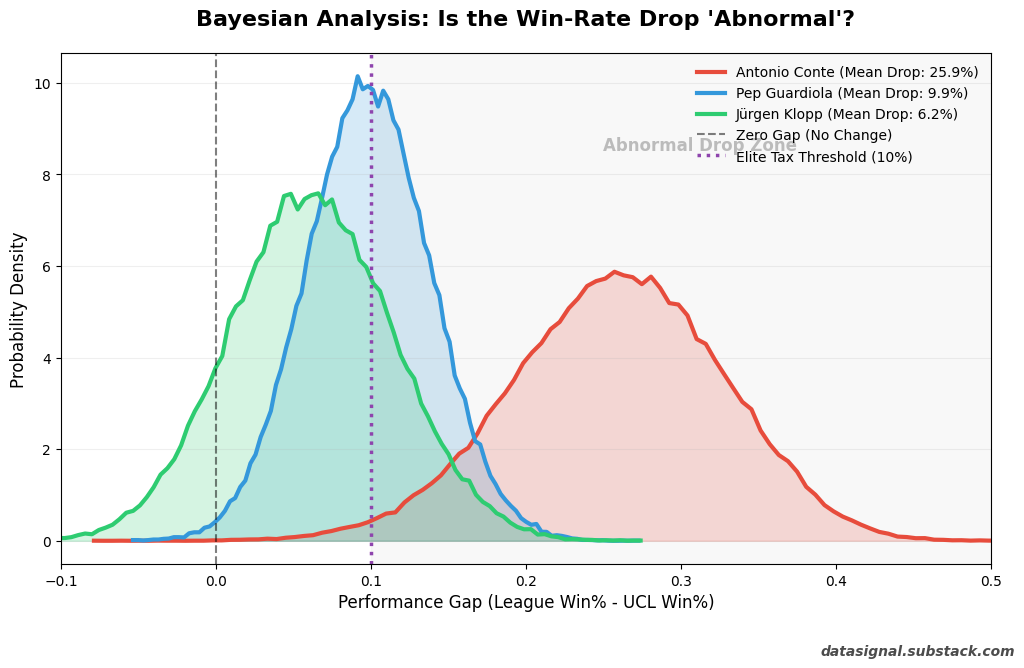

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set seed for reproducible simulations
np.random.seed(42)

# Professional Data Mapping (Updated Jan 2026)
# Format: (UCL_Wins, UCL_Games, League_Wins, League_Games)
manager_stats = {
    'Antonio Conte': (17, 50, 374, 618),
    'Pep Guardiola': (116, 186, 415, 575),
    'Jürgen Klopp':  (58, 102, 338, 537)
}

# Threshold for "Elite Tax" (The normal expected drop in tougher competition)
elite_tax_threshold = 0.10

# Visualization Styling
colors = {'Antonio Conte': '#e74c3c', 'Pep Guardiola': '#3498db', 'Jürgen Klopp': '#2ecc71'}
plt.figure(figsize=(12, 7))

for name, (u_w, u_n, l_w, l_n) in manager_stats.items():
    # Generate Posterior Samples using Beta distribution (Conjugate prior for proportions)
    # Using a flat prior Beta(1,1)
    ucl_posterior = np.random.beta(1 + u_w, 1 + (u_n - u_w), 100000)
    league_posterior = np.random.beta(1 + l_w, 1 + (l_n - l_w), 100000)
    
    # Calculate the Performance Gap (The "Drop")
    performance_gap = league_posterior - ucl_posterior
    
    # Calculate Probability of an "Abnormal" Drop
    prob_abnormal = np.mean(performance_gap > elite_tax_threshold)
    mean_gap = np.mean(performance_gap)
    
    # Plotting the Distribution
    # Using histogram-based density for a clean look
    counts, bin_edges = np.histogram(performance_gap, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, label=f"{name} (Mean Drop: {mean_gap:.1%})", color=colors[name], linewidth=3)
    plt.fill_between(bin_centers, counts, alpha=0.2, color=colors[name])

# Reference Lines
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Zero Gap (No Change)')
plt.axvline(x=elite_tax_threshold, color='#8e44ad', linestyle=':', linewidth=2.5, 
            label=f'Elite Tax Threshold ({elite_tax_threshold:.0%})')

# Shading the "Abnormal Zone"
plt.axvspan(elite_tax_threshold, 0.5, color='gray', alpha=0.05)
plt.text(0.25, plt.ylim()[1]*0.8, 'Abnormal Drop Zone', fontsize=12, fontweight='bold', color='gray', alpha=0.5)

plt.title("Bayesian Analysis: Is the Win-Rate Drop 'Abnormal'?", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Performance Gap (League Win% - UCL Win%)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.xlim(-0.1, 0.5)
plt.legend(loc='upper right', frameon=False)
plt.grid(axis='y', alpha=0.2)

# Use figtext to avoid stretching the axes
plt.figtext(0.92, 0.02, 'datasignal.substack.com', 
            ha='right', 
            fontsize=10, 
            color='black', 
            style='italic', 
            fontweight='bold',
            alpha=0.7)

# Add a small bottom margin to accommodate the text without stretching width
plt.subplots_adjust(bottom=0.15) 

# Save to GitHub folder
save_path = '/Users/shibaprasad/Documents/Projects/shibaprasadb.github.io/images/posts/2026-02-04-tale-of-two-contes/gap_distribution_chart.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved to: {save_path}")
plt.show()